In [72]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

shp = gpd.read_file("vejstoej_boliger_2022_udv/vejstoej_boliger_2022_udv.shp")

# Lokal fil
df_list_HC = pd.read_html("Aktuel luftkvalitet i Danmark.html")
df_list_jagtvej = pd.read_html("Aktuel luftkvalitet i Danmark jagtvej.html")
df_list_oersted = pd.read_html("Aktuel luftkvalitet i Danmark HCoersted.html")



In [73]:
def datetime(df_list):
    df= df_list[0]
    df["Målt (starttid)"] = pd.to_datetime(df["Målt (starttid)"], format="%d-%m-%Y %H:%M")
    df = df.sort_values("Målt (starttid)")
    df.set_index("Målt (starttid)", inplace=True)
    return df

df_HC=datetime(df_list_HC)
df_jagtvej=datetime(df_list_jagtvej)
df_oersted=datetime(df_list_oersted)


In [69]:
def plot_luftforurening(df):
    # Make sure datetime is the index
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("DataFrame index must be a DatetimeIndex")

    # Get unique days for tick values (one per day)
    unique_days = df.index.normalize().unique()
    tickvals = unique_days
    ticktext = [d.strftime("%d-%b") for d in unique_days]

    # Only plot numeric columns
    numeric_cols = df.select_dtypes(include='number').columns

    # Plot
    fig = go.Figure()

    for col in numeric_cols:
        fig.add_trace(go.Scatter(
            x=df.index,
            y=df[col],
            mode='lines',
            name=col
        ))

    fig.update_layout(
        title="Tidsserie af luftforurening på H. C. Andersens Boulevard",
        xaxis_title="Dato",
        yaxis_title="Koncentration (μg/m³ eller tilsvarende)",
        xaxis=dict(
            tickvals=tickvals,
            ticktext=ticktext,
            tickangle=45,
            showgrid=True
        ),
        yaxis=dict(showgrid=True),
        legend=dict(title="Stof"),
        template="plotly_white",
        height=600,
        width=1000
    )

    fig.show()


In [70]:
plot_luftforurening(df_HC)

In [71]:
plot_luftforurening(df_jagtvej)

In [74]:
plot_luftforurening(df_oersted)

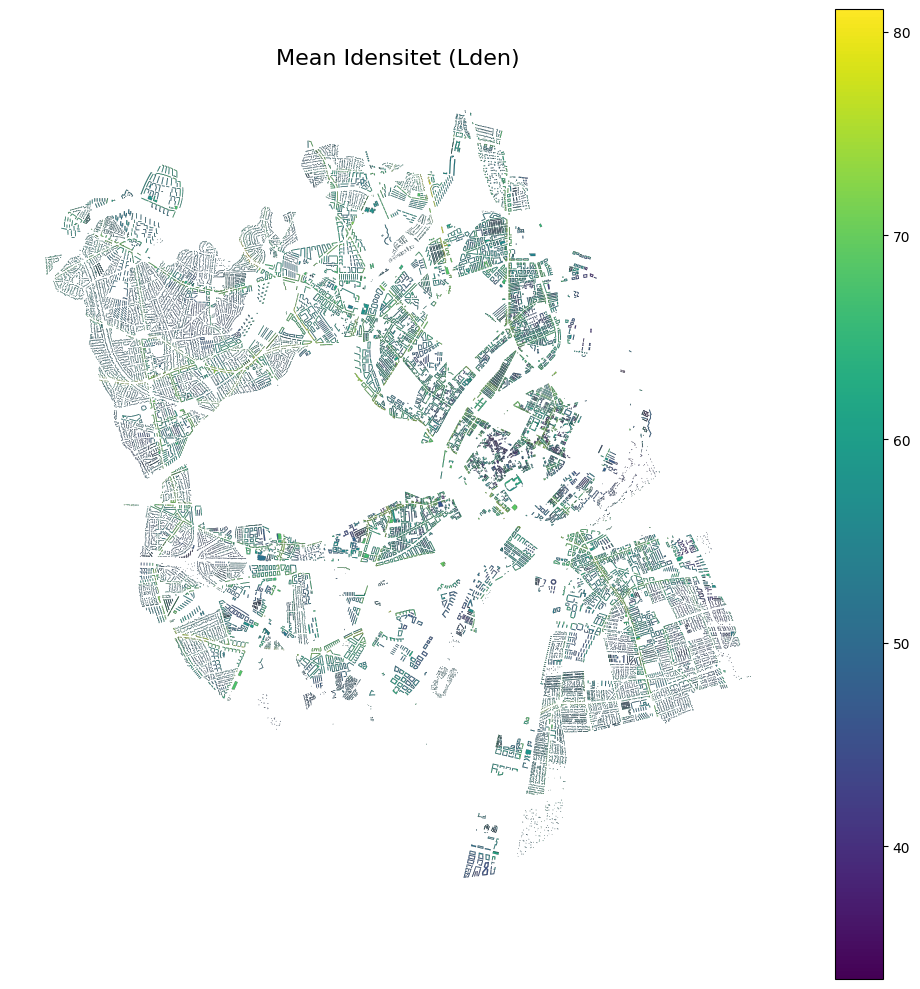

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
shp.plot(column='mean_lden',
         cmap='viridis',  # du kan også prøve 'plasma', 'coolwarm', osv.
         linewidth=0.1,
         edgecolor='black',
         legend=True,
         ax=ax)

ax.set_title("Mean Idensitet (Lden)", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()